# TSF: Data Science & Business Analytics Task - 1

## Prediction of percentage of an student based on the no. of study hours

### Author : Aman Prasad Kalwar

* * *
* * *

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Reading the data from url
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Checking for any null value in the data set

In [7]:
data.isnull == True

False

### Visualization of Data 

Lets plot a graph to see the relationship between the data.

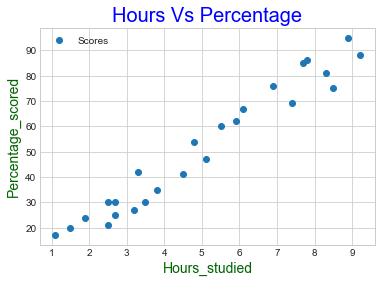

In [141]:
plt.style.use('seaborn-whitegrid')
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours Vs Percentage', color = 'blue', size = 20)
plt.xlabel('Hours_studied', color = 'darkgreen', size = 14)
plt.ylabel('Percentage_scored', color = 'darkgreen', size = 14)
plt.show()

The above graph clearly shows the linear relation between the number of hours studied and the percentage scored.We can confirm the linearity of the relation by printing the correlation.

In [24]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


#### Dividing the dataset into attributes and labels

In [53]:
X = data.iloc[ :, :-1].values
y = data.iloc[ :, 1].values

#### Splitting the data into training and test sets by Scikit  Learn's builtin train_test_split() method.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Training the *algorithm*

In [55]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


#### Plotting the test data using the previously trained test data.

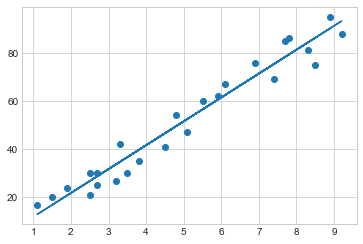

In [57]:
line = regressor1.coef_*X+regressor1.intercept_  
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [60]:
print(X_test)
y_pred = regressor1.predict(X_test)
predict = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Score': [k for k in y_pred]})
predict

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Hours,Predicted Score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


#### Comparing the actual values vs predicted values

In [64]:
compare = pd.DataFrame({'Actual_score': y_test, 'Predicted_score': y_pred})
compare

,Actual_score,Predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Bar Graph showing the actual v/s predicted percentages

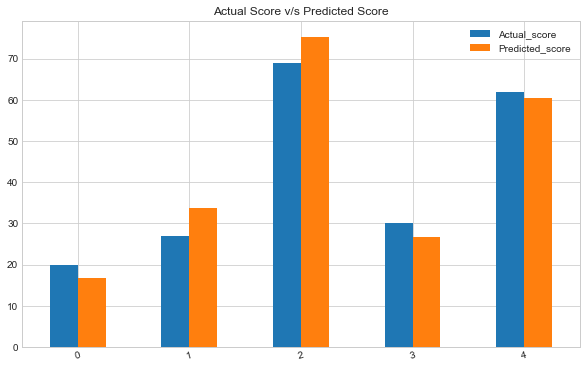

In [101]:
compare.plot.bar(rot =15,title="Actual Score v/s Predicted Score", figsize=(10,6));
plt.show();

### Evaluating the **Model**

In [122]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))

Mean absolute error:  4.183859899002975
Mean squared error:  21.5987693072174


### Predicting the score if a student studies for 9.25 hrs/ day

In [138]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
predicted_score= regressor1.predict(test)
print('No. of hours = {}'.format(hours))
print('Predicted Percentage = {}'.format(round(predicted_score[0],3)))

No. of hours = 9.25
Predicted Percentage = 93.692


##### Thus the student will score 93.692 percent if he/she studies for 9.25 hrs/day